In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\SRET\Internship\Darknet\Darknet.CSV")
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.440000e+15,3117718.131,1.440000e+15,1.440000e+15,Non-Tor,AUDIO-STREAMING


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [4]:
df= df.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp'],axis=1)

In [6]:
# Remove duplicate entries
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

# Remove constant columns
df = df.loc[:, df.apply(pd.Series.nunique) != 1]

# Look at the dataset again
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')
df.head()

Number of Rows: 103152
Number of Columns: 64


,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,6,229,1,1,0,0,0,0,0.000000,0.000000,...,1892,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,6,407,1,1,0,0,0,0,0.000000,0.000000,...,1987,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,6,431,1,1,0,0,0,0,0.000000,0.000000,...,2049,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,6,359,1,1,0,0,0,0,0.000000,0.000000,...,2008,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,6,10778451,591,400,64530,6659,131,0,109.187817,22.283313,...,1382,2320,581,20,1.440000e+15,3117718.131,1.440000e+15,1.440000e+15,Non-Tor,AUDIO-STREAMING


In [7]:
traffic_labels = df["Label"].unique()
print(traffic_labels)
traffic_type_labels = df["Label.1"].unique()
print(traffic_type_labels)

['Non-Tor' 'NonVPN' 'Tor' 'VPN']
['AUDIO-STREAMING' 'Browsing' 'Chat' 'Email' 'File-Transfer'
 'File-transfer' 'P2P' 'Video-Streaming' 'Audio-Streaming'
 'Video-streaming' 'VOIP']


In [8]:
df['Label.1'].loc[df['Label.1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
df['Label.1'].loc[df['Label.1'] == 'File-transfer'] = 'File-Transfer'
df['Label.1'].loc[df['Label.1'] == 'Video-streaming'] = 'Video-Streaming'

df_type_labels = df["Label.1"].unique()
print(df_type_labels)

['Audio-Streaming' 'Browsing' 'Chat' 'Email' 'File-Transfer' 'P2P'
 'Video-Streaming' 'VOIP']


C:\Users\Aswin Raj\AppData\Local\Temp\ipykernel_13800\3236493694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label.1'].loc[df['Label.1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
C:\Users\Aswin Raj\AppData\Local\Temp\ipykernel_13800\3236493694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label.1'].loc[df['Label.1'] == 'File-transfer'] = 'File-Transfer'
C:\Users\Aswin Raj\AppData\Local\Temp\ipykernel_13800\3236493694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [9]:
df['Label'].loc[(df['Label'] == 'Non-Tor') | (df['Label'] == 'NonVPN')] = 'Benign'
df['Label'].loc[(df['Label'] == 'Tor') | (df['Label'] == 'VPN')] = 'Darknet'

df_labels = df["Label"].unique()
print(df_labels)

['Benign' 'Darknet']


C:\Users\Aswin Raj\AppData\Local\Temp\ipykernel_13800\2618847490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'].loc[(df['Label'] == 'Non-Tor') | (df['Label'] == 'NonVPN')] = 'Benign'
C:\Users\Aswin Raj\AppData\Local\Temp\ipykernel_13800\2618847490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'].loc[(df['Label'] == 'Tor') | (df['Label'] == 'VPN')] = 'Darknet'


In [10]:
df['Label'].loc[(df['Label'] == 'Benign')] =0
df['Label'].loc[(df['Label'] == 'Darknet')]=1
df_labels = df["Label"].unique()
print(df_labels)

C:\Users\Aswin Raj\AppData\Local\Temp\ipykernel_13800\516791079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'].loc[(df['Label'] == 'Benign')] =0
C:\Users\Aswin Raj\AppData\Local\Temp\ipykernel_13800\516791079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'].loc[(df['Label'] == 'Darknet')]=1


[0 1]


In [11]:
df["Label"]=df["Label"].astype(str).astype(int)

In [12]:
df["Label"]

0         0
1         0
2         0
3         0
4         0
         ..
141523    1
141524    1
141525    1
141527    1
141529    1
Name: Label, Length: 103152, dtype: int32

In [13]:
df.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,6,229,1,1,0,0,0,0,0.000000,0.000000,...,1892,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,Audio-Streaming
1,6,407,1,1,0,0,0,0,0.000000,0.000000,...,1987,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,Audio-Streaming
2,6,431,1,1,0,0,0,0,0.000000,0.000000,...,2049,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,Audio-Streaming
3,6,359,1,1,0,0,0,0,0.000000,0.000000,...,2008,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,Audio-Streaming
4,6,10778451,591,400,64530,6659,131,0,109.187817,22.283313,...,1382,2320,581,20,1.440000e+15,3117718.131,1.440000e+15,1.440000e+15,0,Audio-Streaming


In [19]:
#Type casting 32bit to 64bit
df= df.iloc[:,:-1].astype(np.float64)
df = df.replace([np.inf, -np.inf], np.nan)
df= df.dropna()

In [18]:
df.iloc[:,-2]

0         0
1         0
2         0
3         0
4         0
         ..
141523    1
141524    1
141525    1
141527    1
141529    1
Name: Label, Length: 103152, dtype: int32

In [42]:
 X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
sc = StandardScaler()
X = sc.fit_transform(X)

In [44]:
y.shape

(103114,)

In [ ]:
# Download the code as excel(for vizualization in powerbi)

In [19]:
# Convert DataFrame to Excel file
writer = pd.ExcelWriter('Darknet_Pre-processed.xlsx')
df.to_excel(writer, index=False)

# Save Excel file to disk
writer.save()

In [22]:
# Load the dataset and split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Define the list of models to train
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]
best_model = None
best_accuracy = 0

In [26]:
# Loop through each model and fit it to the training data
for model in models:
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the classification report
    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    
    # Check if the current model is the best one so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Print the best model and its accuracy
print("Best model:", best_model)
print("Accuracy:", best_accuracy)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     17082
         1.0       0.77      0.66      0.71      3541

    accuracy                           0.91     20623
   macro avg       0.85      0.81      0.83     20623
weighted avg       0.90      0.91      0.90     20623

Model: DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     17082
         1.0       0.89      0.89      0.89      3541

    accuracy                           0.96     20623
   macro avg       0.93      0.94      0.94     20623
weighted avg       0.96      0.96      0.96     20623

Model: RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     17082
         1.0       0.94      0.90      0.92      3541

    accuracy                           0.97     20623
   macro avg       0.96      0.94      0.9

In [27]:
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[16718,   364],
       [  444,  3097]], dtype=int64)

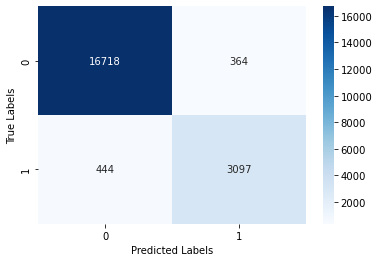

In [45]:
# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [31]:
models = [
    {
        "name": "Logistic Regression",
        "model": LogisticRegression(),
        "params": {
            "penalty": ["l2"],
            "C": [10]
        }
    },
    {
        "name": "Decision Tree",
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini"],
            "max_depth": [10],
            "min_samples_split": [4]
        }
    },
    {
        "name": "Random Forest",
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100],
            "max_depth": [10],
            "min_samples_split": [4]
        }
    },
    {
        "name": "SVM",
        "model": SVC(),
        "params": {
            "kernel": ["linear"],
            "C": [0.1]
        }
    },
    {
        "name": "KNN",
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [5],
            "weights": ["distance"],
            "algorithm": ["kd_tree"]
        }
    }
]

best_model1 = None
best_accuracy1 = 0

In [32]:
# Loop through each model and perform hyperparameter tuning using GridSearchCV
for model in models:
    print(f"Performing hyperparameter tuning for {model['name']}")
    grid = GridSearchCV(model['model'], model['params'], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    # Print the best hyperparameters and accuracy score
    print(f"Best hyperparameters: {grid.best_params_}")
    print(f"Best accuracy score: {grid.best_score_}")

    # Fit the model with the best hyperparameters to the training data
    model['model'].set_params(**grid.best_params_)
    model['model'].fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model['model'].predict(X_test)

    # Calculate the accuracy and print the classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classification report for {model['name']}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}\n")
    
    # Check if the current model is the best one so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Print the best model and its accuracy
print("Best model:", best_model)
print("Accuracy:", best_accuracy)

Performing hyperparameter tuning for Logistic Regression


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Best accuracy score: 0.9081718269571744


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     17082
         1.0       0.76      0.68      0.71      3541

    accuracy                           0.91     20623
   macro avg       0.85      0.82      0.83     20623
weighted avg       0.90      0.91      0.90     20623

Accuracy: 0.9069970421374194

Performing hyperparameter tuning for Decision Tree
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}
Best accuracy score: 0.9601411006949576
Classification report for Decision Tree
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     17082
         1.0       0.90      0.86      0.88      3541

    accuracy                           0.96     20623
   macro avg       0.93      0.92      0.93     20623
weighted avg       0.96      0.96      0.96     20623

Accuracy: 0.9590748193764244

Performing hyperparamete